In [1]:
#!/usr/bin/env python
# coding: utf-8

# # Make a [tonic](https://tonic.readthedocs.io/en/latest/) dataset - see [documentation](https://tonic.readthedocs.io/en/latest/tutorials/wrapping_own_data.html)
# ## Example with the RGB frames dataset provided by NTUA, translated by UCA into events using vid2e

from dataset_creation_aprovis3d import aprovis3dDataset, loadaerdat
from hots.utils import get_dataset_info
from os import walk, path
import numpy as np
import matplotlib.pyplot as plt

# path where you'll go to find your .npy files to make the dataset with
### TO BE MODIFIED
# path = '../../Data/DVS128_ZED_NUC_jAER/'
data_path = '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/'

/home/amelie/VirtualEnvironments/HOTS/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
event_files = []
for (rep_path, _, files) in walk(data_path):
    for f in files: 
        if f.endswith('aedat'):
            event_files.append(path.join(rep_path, f))
print(event_files)

['/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_5_only_ground/DVS128_06_06_2022_session_5.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_4_only_sea/DVS128_06_06_2022_session_4.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_3_only_ground/DVS128_06_06_2022_session_3.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_6_only_sea/DVS128_06_06_2022_session_6.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_2_only_sea/DVS128_06_06_2022_session_2.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_1_only_ground/DVS128_06_06_2022_session_1.aedat']


In [3]:
# load data
ev = loadaerdat(event_files[0])
label = 'sea' if 'sea' in event_files[0] else 'ground'
print(label)

dtype = np.dtype([("x", int), ("y", int), ("t", int), ("p", int)])
ordering = dtype.names

file size 7540673
read 942584 (~ 0.94M) AE events, duration= 304.67s
showing first 5:
timestamps: [1378698305, 218768160, 543781664, 1998602565, 1629513321] 
X-addr: [34, 24, 57, 48, 58]
Y-addr: [65, 46, 105, 114, 97]
polarity: [1, 0, 1, 1, 0]
ground


# Display event repartition

In [4]:
min_ts = np.min(ev[:,ordering.index('t')])
max_ts = np.max(ev[:,ordering.index('t')])
print('Min timestamps:', min_ts)
print('Max timestamps:', max_ts)

Min timestamps: 4113026.0
Max timestamps: 4282598039.0


## Patch duration = $10^5$

(array([2932.,  726., 1044., ..., 1612.,  328.,  327.]),
 array([4.11302600e+06, 4.21302799e+06, 4.31302997e+06, ...,
        4.28239804e+09, 4.28249804e+09, 4.28259804e+09]),
 <BarContainer object of 42784 artists>)

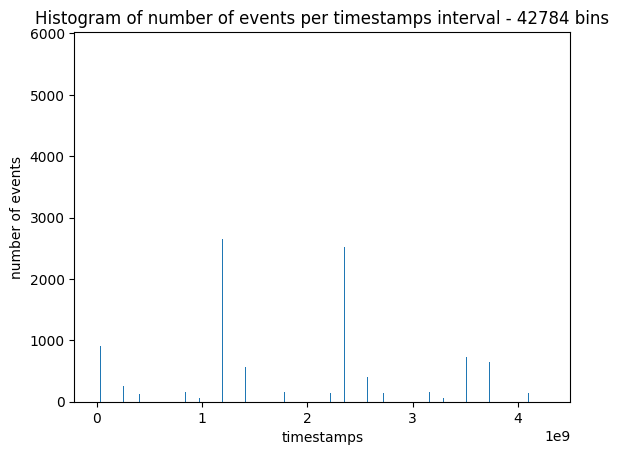

In [5]:
frame_bin=int((max_ts - min_ts)//1e5)
plt.title('Histogram of number of events per timestamps interval - '+str(frame_bin)+' bins')
plt.xlabel('timestamps')
plt.ylabel('number of events')
plt.hist(ev[:, ordering.index('t')], bins=frame_bin)

## Patch duration = $10^3$

In [6]:
nb_events_per_bin, edges = np.histogram(
    ev[:, ordering.index("t")],
    bins = range(int(min_ts), int(max_ts), int(1e3))
)

print(len(nb_events_per_bin))
print('Empty bins in patchs of 1e3 micro s:', list(nb_events_per_bin).count(0))
print(max(nb_events_per_bin))

4278485
Empty bins in patchs of 1e3 micro s: 4167100
1262


(array([4.270113e+06, 5.061000e+03, 8.330000e+02, 3.500000e+02,
        2.300000e+02, 1.720000e+02, 1.310000e+02, 1.240000e+02,
        1.080000e+02, 9.700000e+01, 7.000000e+01, 6.900000e+01,
        7.500000e+01, 5.100000e+01, 5.200000e+01, 4.600000e+01,
        5.000000e+01, 4.400000e+01, 3.500000e+01, 4.900000e+01,
        3.700000e+01, 3.200000e+01, 2.100000e+01, 2.800000e+01,
        3.700000e+01, 3.000000e+01, 4.100000e+01, 2.000000e+01,
        1.500000e+01, 3.700000e+01, 3.500000e+01, 1.700000e+01,
        3.300000e+01, 1.800000e+01, 2.600000e+01, 1.500000e+01,
        2.000000e+01, 1.700000e+01, 1.800000e+01, 1.500000e+01,
        1.400000e+01, 1.400000e+01, 1.800000e+01, 1.100000e+01,
        1.000000e+01, 1.200000e+01, 8.000000e+00, 1.000000e+01,
        1.000000e+01, 9.000000e+00, 7.000000e+00, 9.000000e+00,
        4.000000e+00, 6.000000e+00, 2.000000e+00, 8.000000e+00,
        1.000000e+01, 2.000000e+00, 8.000000e+00, 1.000000e+00,
        2.000000e+00, 5.000000e+00, 5.00

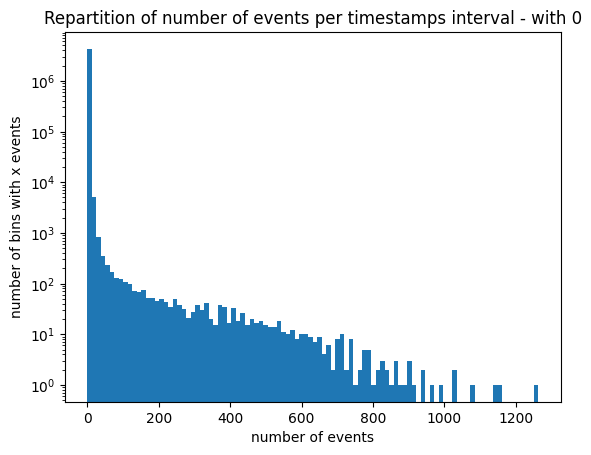

In [7]:
plt.title('Repartition of number of events per timestamps interval - with 0')
plt.yscale('log')
plt.xlabel('number of events')
plt.ylabel('number of bins with x events')
plt.hist(nb_events_per_bin, bins=100)

(array([1.03886e+05, 4.31100e+03, 7.46000e+02, 3.35000e+02, 2.21000e+02,
        1.72000e+02, 1.33000e+02, 1.24000e+02, 1.00000e+02, 9.90000e+01,
        6.20000e+01, 7.70000e+01, 6.70000e+01, 5.40000e+01, 5.30000e+01,
        4.50000e+01, 4.90000e+01, 4.20000e+01, 3.80000e+01, 4.80000e+01,
        3.50000e+01, 3.60000e+01, 1.90000e+01, 2.80000e+01, 3.60000e+01,
        2.90000e+01, 4.10000e+01, 2.00000e+01, 1.80000e+01, 3.60000e+01,
        3.30000e+01, 2.30000e+01, 3.00000e+01, 1.50000e+01, 2.60000e+01,
        1.50000e+01, 2.00000e+01, 1.80000e+01, 1.70000e+01, 1.60000e+01,
        1.50000e+01, 1.20000e+01, 1.80000e+01, 1.10000e+01, 1.30000e+01,
        9.00000e+00, 8.00000e+00, 1.00000e+01, 1.00000e+01, 1.00000e+01,
        6.00000e+00, 9.00000e+00, 4.00000e+00, 6.00000e+00, 2.00000e+00,
        9.00000e+00, 9.00000e+00, 4.00000e+00, 6.00000e+00, 1.00000e+00,
        2.00000e+00, 5.00000e+00, 5.00000e+00, 1.00000e+00, 2.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 4.00

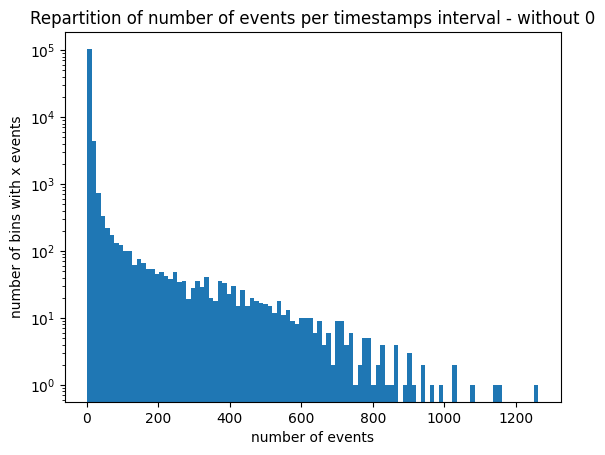

In [8]:
plt.title('Repartition of number of events per timestamps interval - without 0')
plt.yscale('log')
plt.xlabel('number of events')
plt.ylabel('number of bins with x events')
plt.hist(
    list(filter(lambda x: x != 0, nb_events_per_bin)),
    bins=100
)

# Visualise frame

In [9]:
# timewindow = bin_frame
W = np.max(ev[:,ordering.index('x')])
H = np.max(ev[:,ordering.index('y')])

positive_ev = ev[ ev[:,ordering.index('p')] > 0 ]
negative_ev = ev[ ev[:,ordering.index('p')] < 1 ]

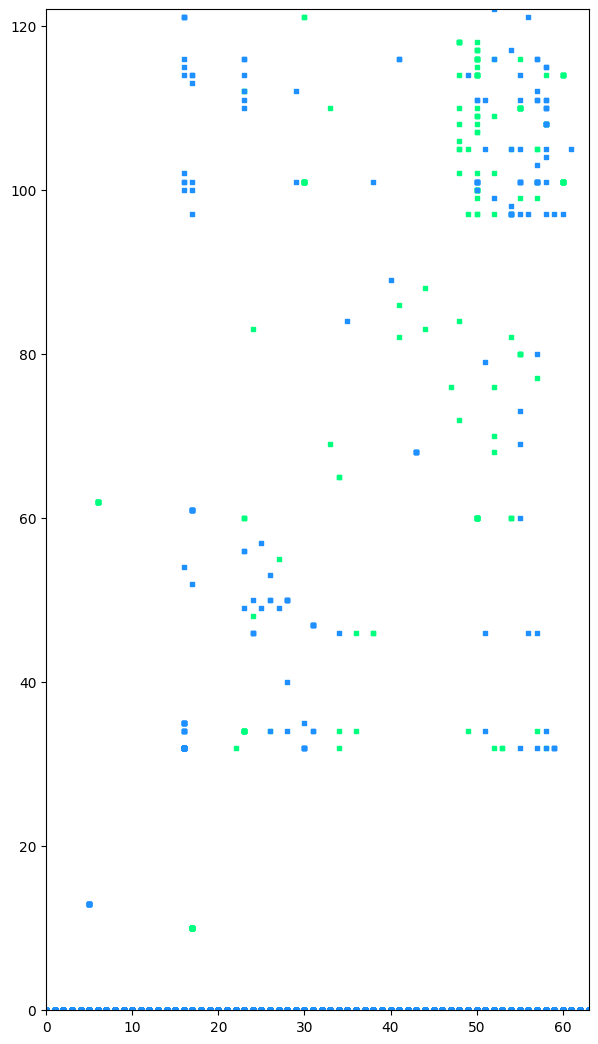

In [10]:
fig_events = plt.figure(figsize=(7,int(H*7/W)))
ax = plt.axes(xlim=(0, W), ylim=(0,H))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

# positive_ev = positive_ev[positive_ev[:,ordering.index('t')] < timewindow]
# negative_ev = negative_ev[negative_ev[:,ordering.index('t')] < timewindow]
scatter_pos_events = plt.scatter(positive_ev[:,ordering.index('x')], positive_ev[:,ordering.index('y')], marker="s", color="springgreen", label="Positive events", s=s)
scatter_neg_events = plt.scatter(negative_ev[:,ordering.index('x')], negative_ev[:,ordering.index('y')], marker="s", color="dodgerblue", label="Negative events", s=s)

## Visualise animated events

4278.484448


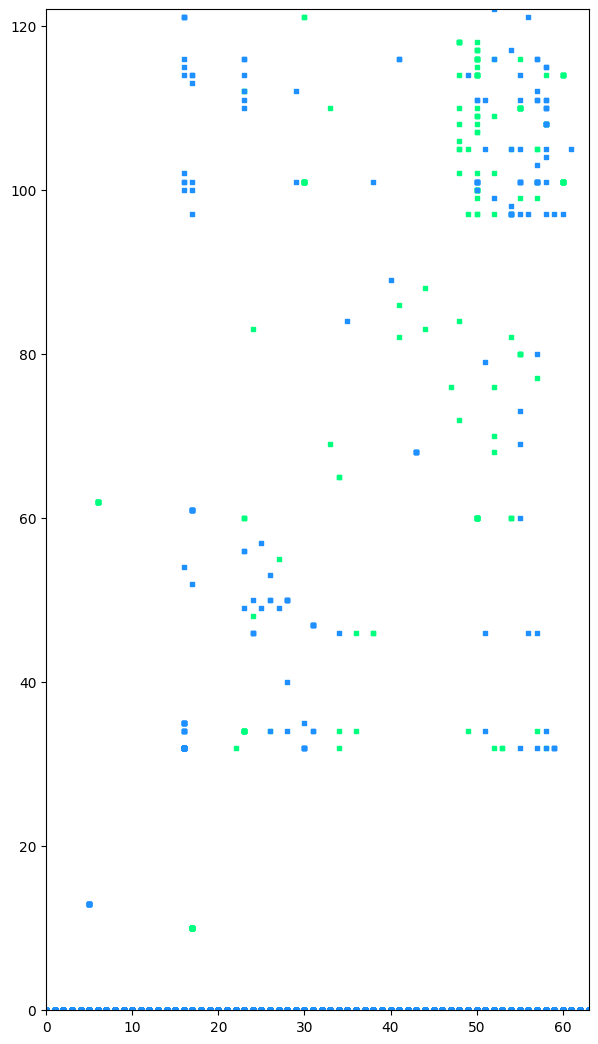

In [11]:
from matplotlib.animation import FuncAnimation

fig_events = plt.figure(figsize=(7,int(H*7/W)))
ax = plt.axes(xlim=(0, W), ylim=(0,H))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

scatter_pos_events = ax.scatter([],[], marker="s", animated=True, color="springgreen", label="Positive events", s=s)
scatter_neg_events = ax.scatter([],[], marker="s", animated=True, color="dodgerblue", label="Negative events", s=s)

positive_ev[:, ordering.index('t')] = (positive_ev[:, ordering.index('t')] - min_ts) / 1e6
negative_ev[:, ordering.index('t')] = (negative_ev[:, ordering.index('t')] - min_ts) / 1e6
print(max(negative_ev[:, ordering.index('t')]))

fps = 30
frame_interval = 1e6/24
timestamps = 0

def animate(i):
    global timestamps
    previous_timestamps = timestamps
    timestamps += frame_interval
    
    scatter_pos_events.set_offsets(positive_ev[(positive_ev[:,ordering.index('t')] >= previous_timestamps) & (positive_ev[:,ordering.index('t')] < timestamps)][: , ordering.index('x'):ordering.index('y')+1])
    scatter_neg_events.set_offsets(negative_ev[(negative_ev[:,ordering.index('t')] >= previous_timestamps) & (negative_ev[:,ordering.index('t')] < timestamps)][: , ordering.index('x'):ordering.index('y')+1])
    
    return scatter_pos_events, scatter_neg_events,

animation = FuncAnimation(fig_events, animate, blit=True, frames = int((max_ts - min_ts)/1e6 * fps), interval=1e3/fps, repeat=False)

## Visualise events with $y=0$ over time

Text(0, 0.5, 'x coordinates')

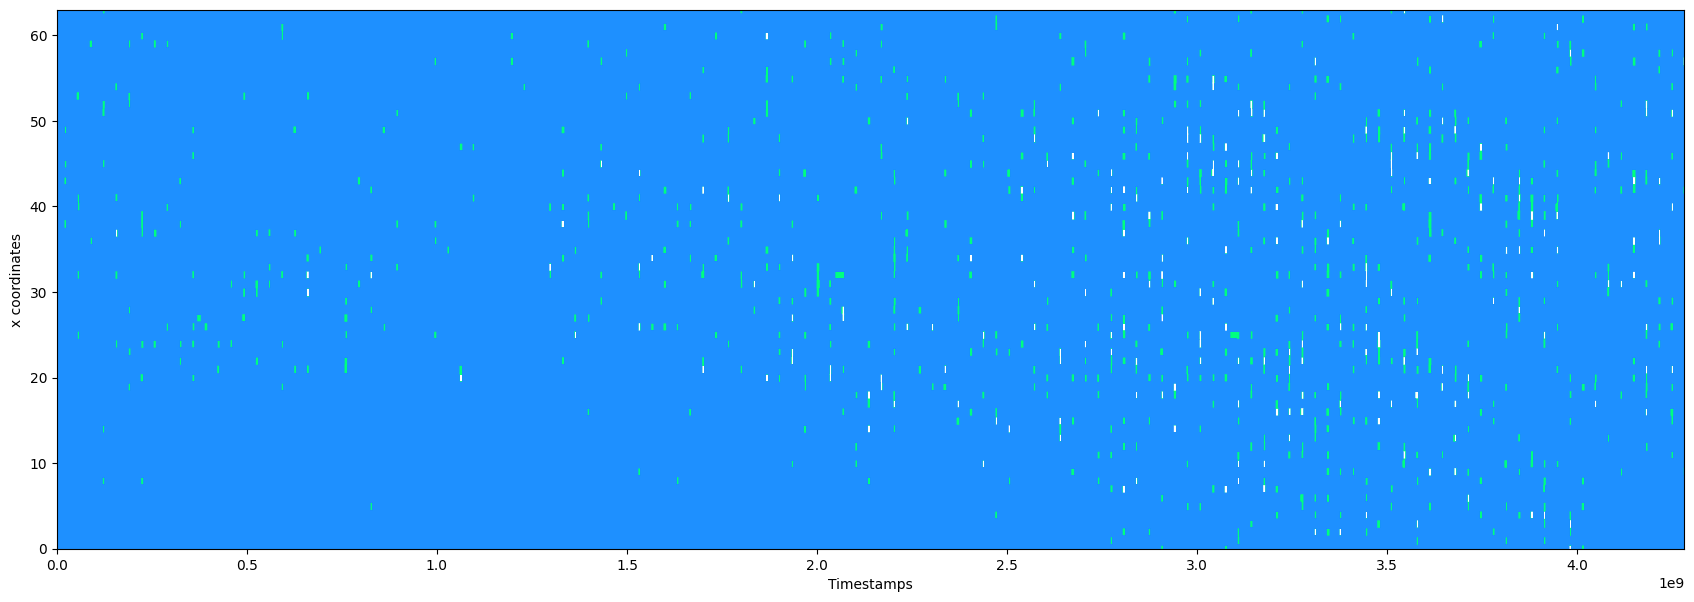

In [12]:
fig_events = plt.figure(figsize=(21, 7))
ax = plt.axes(xlim=(0, max_ts), ylim=(0,max(ev[:,ordering.index('x')])))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

positive_ev = ev[ (ev[:,ordering.index('p')] > 0) & (ev[:,ordering.index('y')] == 0) ]
negative_ev = ev[ (ev[:,ordering.index('p')] < 1) & (ev[:,ordering.index('y')] == 0) ]

scatter_pos_events = plt.scatter(positive_ev[:,ordering.index('t')], positive_ev[:,ordering.index('x')], marker="s", color="springgreen", label="Positive events", s=s)
scatter_neg_events = plt.scatter(negative_ev[:,ordering.index('t')], negative_ev[:,ordering.index('x')], marker="s", color="dodgerblue", label="Negative events", s=s)

plt.xlabel('Timestamps')
plt.ylabel('x coordinates')

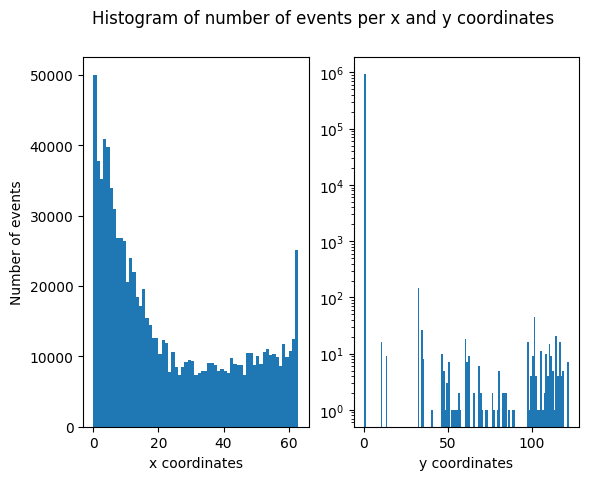

In [13]:
frame_bin=int(1e5)
f,axes = plt.subplots(1,2)
f.suptitle('Histogram of number of events per x and y coordinates')

axes[0].set_ylabel('Number of events')

axes[0].hist(ev[:, ordering.index('x')], bins=int(max(ev[:,ordering.index('x')])))
axes[0].set_xlabel('x coordinates')

axes[1].hist(ev[:, ordering.index('y')], bins=int(max(ev[:,ordering.index('y')])))
axes[1].set_xlabel('y coordinates')
axes[1].set_yscale('log')